In [116]:
import pandas as pd
import numpy as np


In [117]:
players = pd.read_csv('/Users/adolf/Documents/DS_Portfolio/Data_Sets/england-premier-league-players-2018-to-2019-stats.csv')
players

,full_name,age,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Callum Paterson,25,Premier League,2018/2019,Defender,Cardiff City,1996,1024,972,Scotland,...,1.67,54,74,499,1996,0.18,110,213,137,3
1,Stuart Armstrong,27,Premier League,2018/2019,Midfielder,Southampton,1432,469,963,Scotland,...,1.45,62,49,716,716,0.13,96,112,-1,6
2,Stefan Marius Johansen,28,Premier League,2018/2019,Midfielder,Fulham,412,130,282,Norway,...,2.40,37,34,103,0,0.87,318,382,-1,24
3,James Maddison,23,Premier League,2018/2019,Midfielder,Leicester City,2850,1535,1315,England,...,1.23,73,79,570,407,0.16,89,56,-1,2
4,Emerson Hyndman,23,Premier League,2018/2019,Midfielder,AFC Bournemouth,37,0,37,USA,...,4.86,19,37,0,0,0.00,-1,-1,-1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Bernardo Silva,25,Premier League,2018/2019,Midfielder,Manchester City,2853,1470,1383,Portugal,...,0.69,130,79,951,408,0.09,83,57,-1,6
568,Kelechi Iheanacho,23,Premier League,2018/2019,Forward,Leicester City,926,408,518,Nigeria,...,1.07,84,31,463,309,0.19,156,28,-1,13
569,Lucas Torreira,23,Premier League,2018/2019,Midfielder,Arsenal,2377,1231,1146,Uruguay,...,1.33,68,70,264,1189,0.34,188,176,-1,10
570,Gabriel Jesus,22,Premier League,2018/2019,Forward,Manchester City,1019,702,317,Brazil,...,0.97,93,35,1019,340,0.09,6,32,-1,4


In [118]:
#Create a list of dataframe features for easy reading 
columns = [players.columns]
columns


[Index(['full_name', 'age', 'league', 'season', 'position', 'Current Club',
        'minutes_played_overall', 'minutes_played_home', 'minutes_played_away',
        'nationality', 'appearances_overall', 'appearances_home',
        'appearances_away', 'goals_overall', 'goals_home', 'goals_away',
        'assists_overall', 'assists_home', 'assists_away', 'penalty_goals',
        'penalty_misses', 'clean_sheets_overall', 'clean_sheets_home',
        'clean_sheets_away', 'conceded_overall', 'conceded_home',
        'conceded_away', 'yellow_cards_overall', 'red_cards_overall',
        'goals_involved_per_90_overall', 'assists_per_90_overall',
        'goals_per_90_overall', 'goals_per_90_home', 'goals_per_90_away',
        'min_per_goal_overall', 'conceded_per_90_overall',
        'min_per_conceded_overall', 'min_per_match', 'min_per_card_overall',
        'min_per_assist_overall', 'cards_per_90_overall',
        'rank_in_league_top_attackers', 'rank_in_league_top_midfielders',
        'rank

In [138]:
#The original dataframe contains plenty of different kinds of features as well as different tyoes of players 
#we will group and select players with their relevant performance metrics 

#performance_cols = ['goals_overall','assists_overall','penalty_misses','clean_sheets_overall','']

Forwards = players[players['position'] == 'Forward']
Midfielders = players[players['position'] == 'Midfielder']
Defenders = players[players['position'] == 'Defender']
Goalkeepers = players[players['position'] == 'Goalkeeper']

#relevant performance predictors
Fperformance = ['minutes_played_overall','goals_overall','assists_overall']

#Target is rank, so only use positive rank values
Forwards = Forwards[Forwards['rank_in_league_top_attackers'] > 0]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1C1314D0>,
      dtype=object)

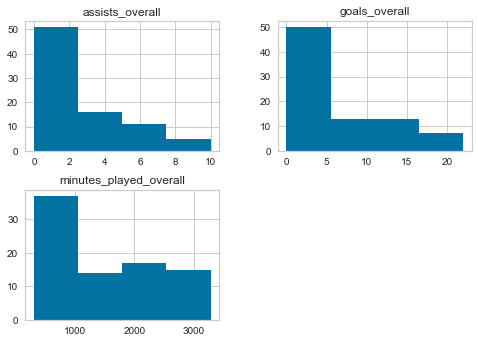

In [139]:
#Lets look at the distributions 
Forwards[Fperformance].hist(bins=4)


In [140]:
Forwards[Fperformance].describe()

,minutes_played_overall,goals_overall,assists_overall
count,83.000000,83.000000,83.000000
mean,1526.650602,6.060241,2.433735
std,880.420803,5.980353,2.504595
min,311.000000,0.000000,0.000000
25%,803.500000,1.000000,0.000000
50%,1227.000000,3.000000,2.000000
75%,2381.000000,10.000000,4.000000
max,3282.000000,22.000000,10.000000


In [141]:
#Train-Test-Split 
#Let's assume that the values come from a gaussian distribution and standardize values
from sklearn.model_selection import train_test_split
X = Forwards[Fperformance]
y = Forwards['rank_in_league_top_attackers']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
standard_Xtrain = scaler.fit_transform(X_train)
standard_Xtest = scaler.fit_transform(X_test)

In [142]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)
model1 = lr.fit(standard_Xtrain, y_train)
y_pred = model1.predict(standard_Xtest)

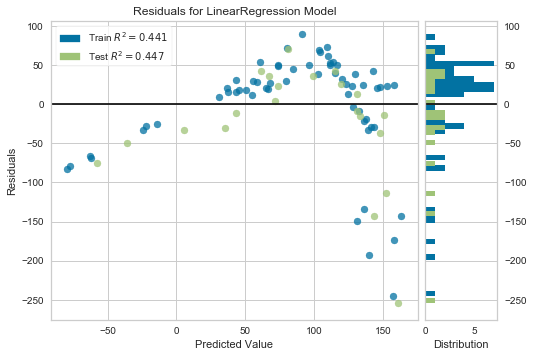

In [143]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model1)

visualizer.fit(standard_Xtrain, y_train)  # Fit the training data to the visualizer
visualizer.score(standard_Xtest, y_test)  # Evaluate the model on the test data
visualizer.show() 

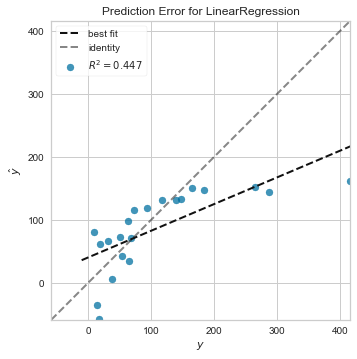

In [144]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model1)

visualizer.fit(standard_Xtrain, y_train)  # Fit the training data to the visualizer
visualizer.score(standard_Xtest, y_test)  # Evaluate the model on the test data
visualizer.show() 

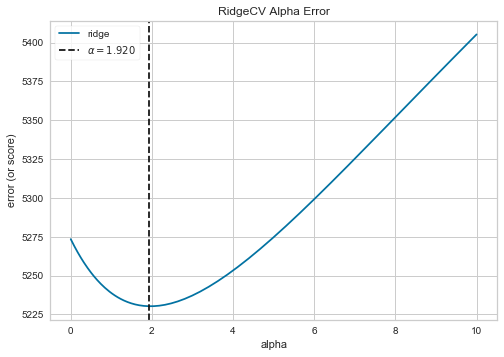

In [145]:
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import RidgeCV

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model2 = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model2)
visualizer.fit(standard_Xtrain, y_train)
visualizer.show()

In [146]:
from sklearn.linear_model import Ridge

model2 = Ridge(alpha=1.92)
model2 = model2.fit(standard_Xtrain, y_train)

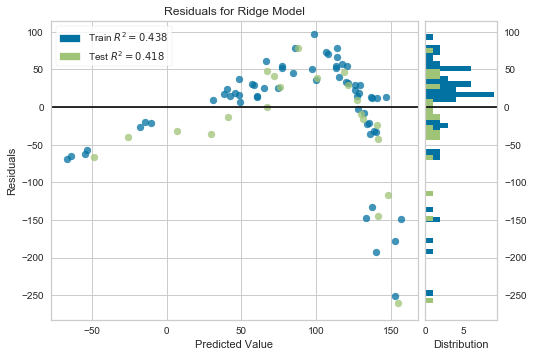

In [147]:
visualizer = ResidualsPlot(model2)

visualizer.fit(standard_Xtrain, y_train)  # Fit the training data to the visualizer
visualizer.score(standard_Xtest, y_test)  # Evaluate the model on the test data
visualizer.show() 

c:\users\adolf\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


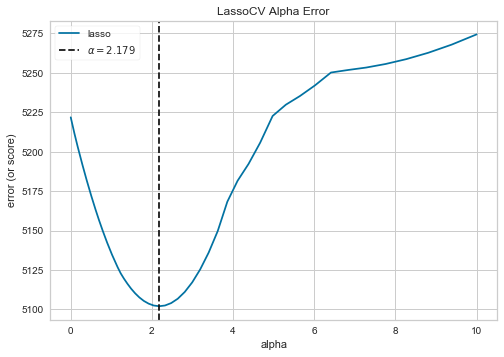

In [148]:
from sklearn.linear_model import LassoCV

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model3 = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model3)
visualizer.fit(standard_Xtrain, y_train)
visualizer.show()

In [149]:
from sklearn.linear_model import Lasso

model3 = Ridge(alpha=2.179)
model3 = model3.fit(standard_Xtrain, y_train)

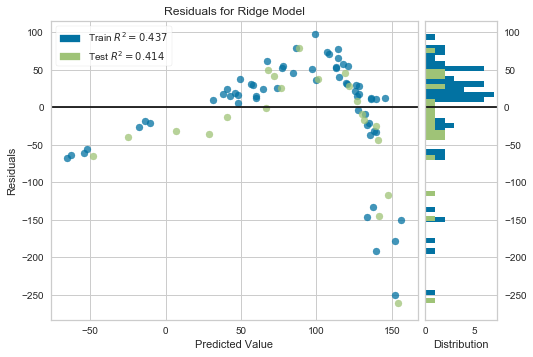

In [150]:
visualizer = ResidualsPlot(model3)

visualizer.fit(standard_Xtrain, y_train)  # Fit the training data to the visualizer
visualizer.score(standard_Xtest, y_test)  # Evaluate the model on the test data
visualizer.show()

## Retrain Without Standardization 

In [151]:
lr = LinearRegression(normalize=True)
model4 = lr.fit(X_train, y_train)
y_pred = model4.predict(X_test)

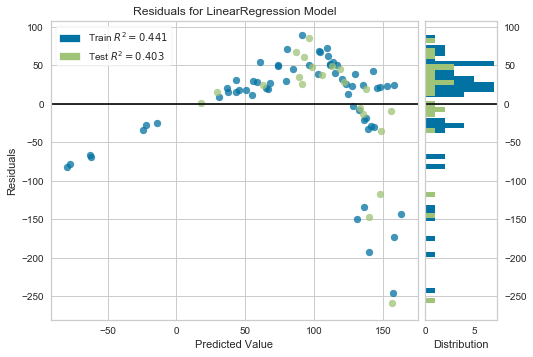

In [152]:
visualizer = ResidualsPlot(model4)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

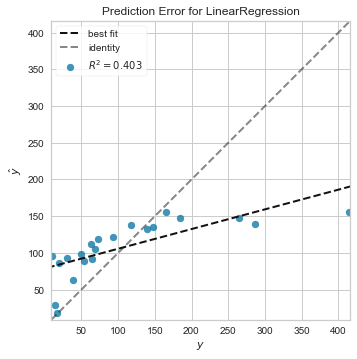

In [153]:
visualizer = PredictionError(model4)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

## Retrain Top Half Performance

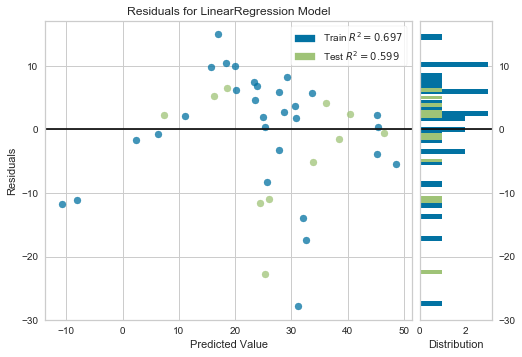

In [160]:
## Our training efforts had a low performance accross algorithms and not much difference without standardization
# This could mean that our features may not be have the best correspondence to our target 
# Because our target is a rank based metric, it is possible that it is most sensitive to the top half players as seen by the mean
# of the predictor distributions. So we train only with the top half 

Forwards = Forwards.sort_values(by='rank_in_league_top_attackers')
Forwards = Forwards.reset_index(drop=True)
Top_Forwards = Forwards.iloc[0:41,:]

X = Top_Forwards[Fperformance]
y = Top_Forwards['rank_in_league_top_attackers']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

lr = LinearRegression(normalize=True)
model5 = lr.fit(X_train, y_train)
y_pred = model5.predict(X_test)

visualizer = ResidualsPlot(model5)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

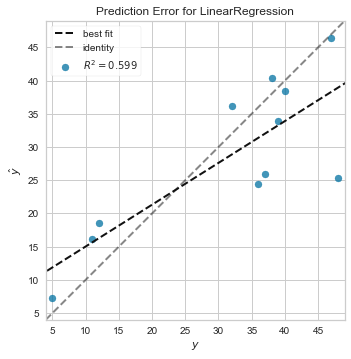

In [161]:
visualizer = PredictionError(model5)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

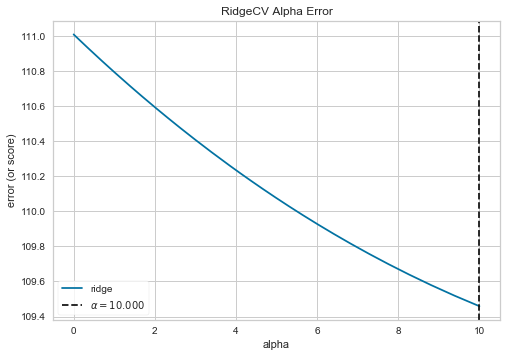

In [164]:
# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model6 = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model6)
visualizer.fit(X_train, y_train)
visualizer.show()

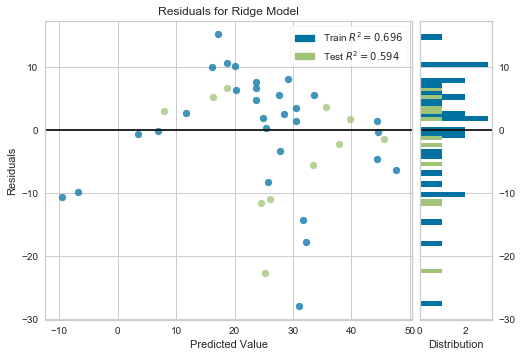

In [166]:
model6 = Ridge(alpha=10)
model6 = model6.fit(X_train, y_train)

visualizer = ResidualsPlot(model6)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

c:\users\adolf\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


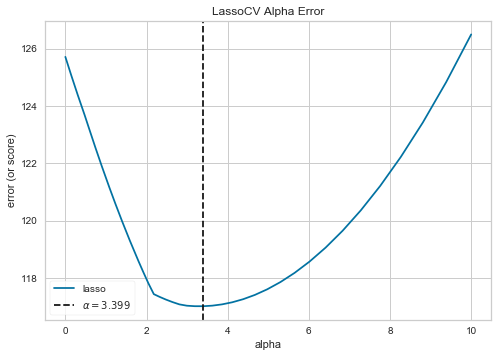

In [167]:
# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model7 = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model7)
visualizer.fit(X_train, y_train)
visualizer.show()

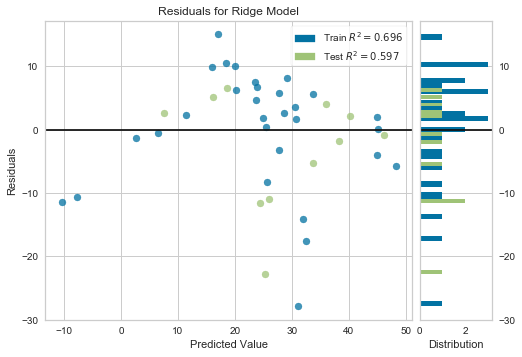

In [168]:
model7 = Ridge(alpha=3.399)
model7 = model7.fit(X_train, y_train)

visualizer = ResidualsPlot(model7)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [ ]:
#As we suspected, the features we used as predictors were more relevant to the top half players.
#In order to create a better model we can test the extent of the linear relationship of each feature or we can exclude outliers
#We can still see that some players have big residual values and inspect whether there is something about those players that may help adjust our model 
#For now we will save that for another tutorial 